In [1]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [2]:
# # Import mnist data
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype('float32')/255

# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype('float32')/255

# print(f'Train images shape: {train_images.shape}')
# print(f'Test images shape: {test_images.shape}')

In [3]:
# # Create the model
# inputs = keras.Input(shape=(28,28,1))
# x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10, activation='softmax')(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# model.summary()

In [4]:
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [5]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f'Test Accuracy: {test_acc}')

# Cats and Dogs
---

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lennykiruthu","key":"bffd60b92f708ce59c7dab8b6e152744"}'}

In [7]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 89% 195M/218M [00:00<00:00, 488MB/s]
100% 218M/218M [00:00<00:00, 516MB/s]


In [9]:
!unzip cat-and-dog.zip -d cat_and_dog

Streaming output truncated to the last 5000 lines.
  inflating: cat_and_dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat_and_dog/tr

In [10]:
import  os, shutil, pathlib

In [11]:
original_dir  = pathlib.Path('/content/cat_and_dog/training_set/training_set')
new_base_path = pathlib.Path('/content/cat_and_dog_small')

In [12]:
def make_subset(subset_name, start_index, end_index):
  for category in ('cats', 'dogs'):
    dir = new_base_path / subset_name / category
    os.makedirs(dir)

    fnames = [f'{category[:-1]}.{i}.jpg' for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir/category/fname,
                      dst=dir/fname)

make_subset('train', start_index=1000, end_index=2000)
make_subset('validation', start_index=2000, end_index=2500)
make_subset('test', start_index=2500, end_index=3000)

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

Image 1: dog.1016.jpg
 - Format: JPEG
 - Size (width x height): (275, 335)
 - Mode: RGB
----------------------------------------


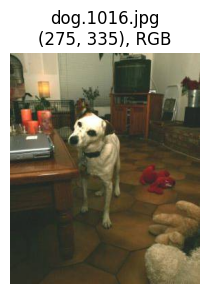

Image 2: dog.1131.jpg
 - Format: JPEG
 - Size (width x height): (499, 380)
 - Mode: RGB
----------------------------------------


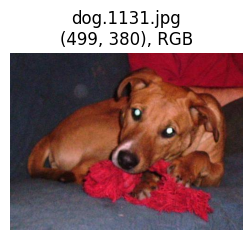

Image 3: dog.1456.jpg
 - Format: JPEG
 - Size (width x height): (479, 360)
 - Mode: RGB
----------------------------------------


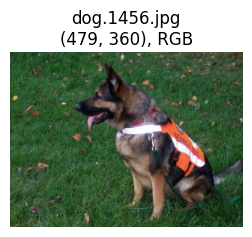

Image 4: dog.1484.jpg
 - Format: JPEG
 - Size (width x height): (200, 164)
 - Mode: RGB
----------------------------------------


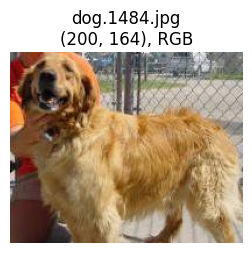

Image 5: dog.1519.jpg
 - Format: JPEG
 - Size (width x height): (480, 359)
 - Mode: RGB
----------------------------------------


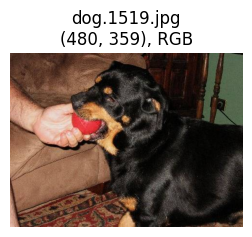

Image 6: dog.1658.jpg
 - Format: JPEG
 - Size (width x height): (292, 390)
 - Mode: RGB
----------------------------------------


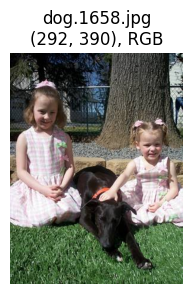

Image 7: dog.1850.jpg
 - Format: JPEG
 - Size (width x height): (500, 332)
 - Mode: RGB
----------------------------------------


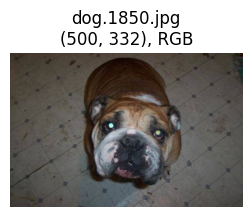

Image 8: dog.1953.jpg
 - Format: JPEG
 - Size (width x height): (499, 375)
 - Mode: RGB
----------------------------------------


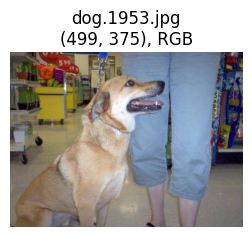

Image 9: dog.1986.jpg
 - Format: JPEG
 - Size (width x height): (275, 315)
 - Mode: RGB
----------------------------------------


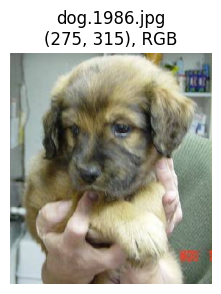

Image 10: dog.1995.jpg
 - Format: JPEG
 - Size (width x height): (499, 375)
 - Mode: RGB
----------------------------------------


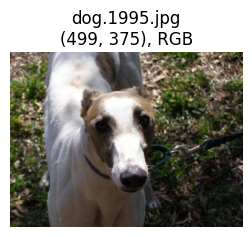

In [14]:
folder_path = '/content/cat_and_dog_small/train/dogs'

image_files = sorted(os.listdir(folder_path)[:10])

for i, filename in enumerate(image_files):
  img_path = os.path.join(folder_path, filename)

  try:
      with Image.open(img_path) as img:
        # Print image properties
        print(f"Image {i+1}: {filename}")
        print(f" - Format: {img.format}")
        print(f" - Size (width x height): {img.size}")
        print(f" - Mode: {img.mode}")
        print("-" * 40)

        # Show the image
        plt.figure(figsize=(3,3))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{filename}\n{img.size}, {img.mode}")
        plt.show()

  except Exception as e:
    print(f"Could not open {filename}: {e}")

In [15]:
inputs  = keras.Input(shape=(180,180,3))
x       = layers.Rescaling(1./255)(inputs)
x       = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/cat_and_dog_small/train',
                                             image_size=(180, 180),
                                             batch_size=32)

test_dataset = image_dataset_from_directory('/content/cat_and_dog_small/test',
                                             image_size=(180, 180),
                                             batch_size=32)

val_dataset = image_dataset_from_directory('/content/cat_and_dog_small/validation',
                                             image_size=(180, 180),
                                             batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [18]:
for data_batch, label_batch in train_dataset:
  print('Data batch shape:', data_batch.shape)
  print('Data label shape:', label_batch.shape)
  break

Data batch shape: (32, 180, 180, 3)
Data label shape: (32,)


In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [20]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4885 - loss: 0.6983 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.4967 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5454 - loss: 0.6900 - val_accuracy: 0.5400 - val_loss: 0.6974
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6068 - loss: 0.6651 - val_accuracy: 0.5800 - val_loss: 0.6875
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6265 - loss: 0.6353 - val_accuracy: 0.5740 - val_loss: 0.7408
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6682 - loss: 0.6053 - val_accuracy: 0.6390 - val_loss: 0.6236
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7030 - loss: 0.5606 - val_accuracy: 0.6980 - val_loss: 0.5808
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7451 - loss: 0.5279 - val_accuracy: 0.7050 -

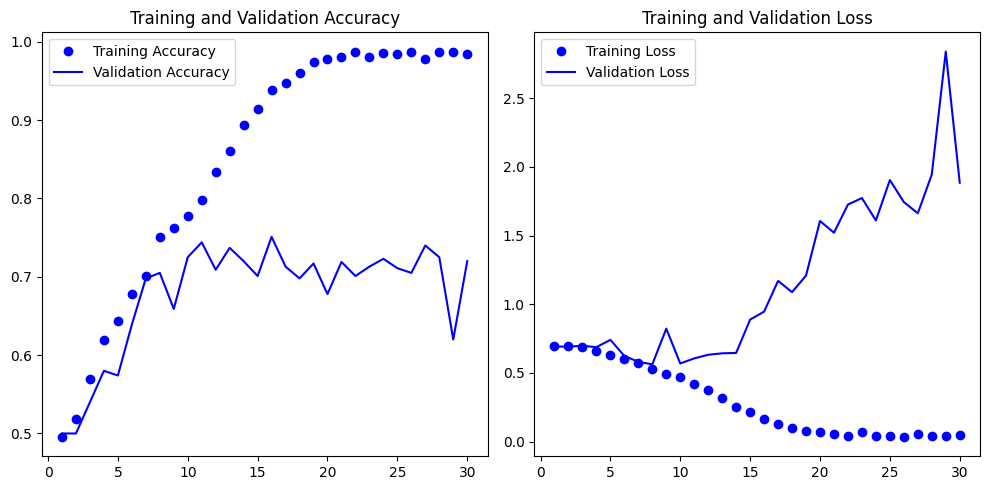

In [21]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [22]:
test_model = keras.models.load_model('/content/convet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6826 - loss: 0.5824
Test Accuracy: 0.684


In [23]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

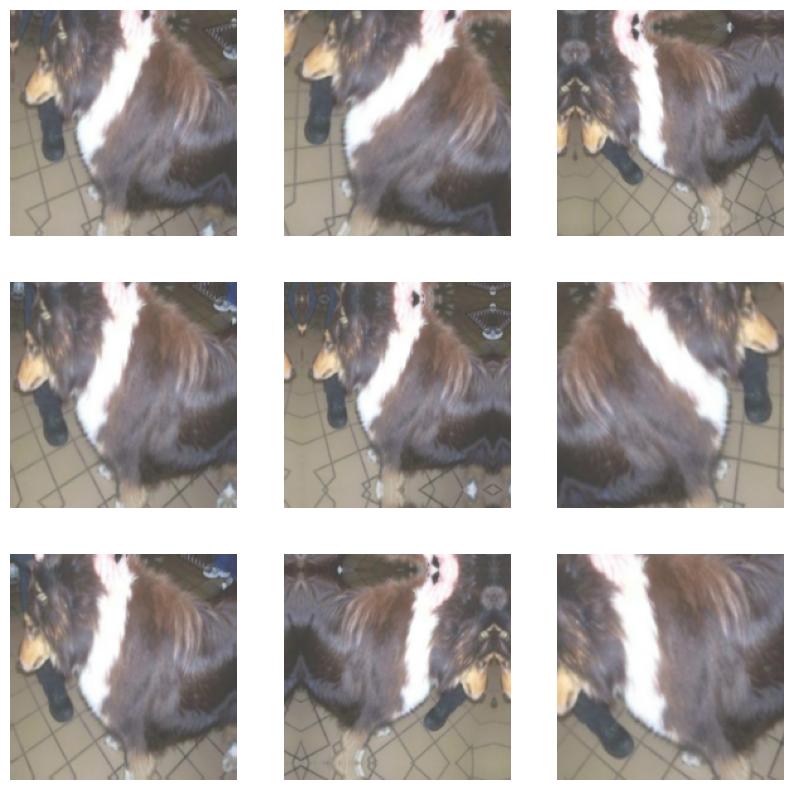

In [25]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [33]:
inputs  = keras.Input(shape=(180,180,3))
x       = data_augmentation(inputs)
x       = layers.Rescaling(1./255)(x)
x       = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Flatten()(x)
x       = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convet_from_scratch_with_data_augmentation.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [36]:
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.4734 - loss: 0.7153 - val_accuracy: 0.6170 - val_loss: 0.6923
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5063 - loss: 0.6993 - val_accuracy: 0.5020 - val_loss: 0.6901
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5471 - loss: 0.6924 - val_accuracy: 0.6200 - val_loss: 0.6684
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5653 - loss: 0.6824 - val_accuracy: 0.6580 - val_loss: 0.6366
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6093 - loss: 0.6515 - val_accuracy: 0.6250 - val_loss: 0.6499
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6096 - loss: 0.6525 - val_accuracy: 0.6800 - val_loss: 0.6203
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6496 - loss: 0.6194 - val_accuracy: 0.5990 - val_loss: 0.6873
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6451 - loss: 0.6285 - val_accuracy: 0.

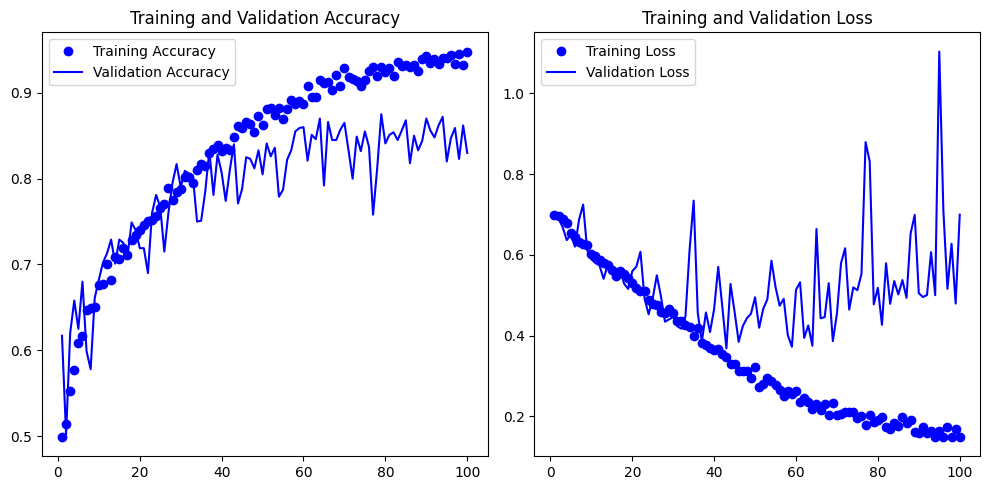

In [37]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [38]:
test_model = keras.models.load_model('/content/convet_from_scratch_with_data_augmentation.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8307 - loss: 0.4036
Test Accuracy: 0.835


In [39]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3)
)

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)